# Loading Salary Database for EDA

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [73]:
salary=pd.read_csv('Salary.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [74]:
salary.tail()

,YearsExperience,Salary
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [75]:
salary.shape

(35, 2)

In [76]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


# Summary Statistics

In [77]:
salary.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [78]:
salary.Salary.unique()

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465], dtype=int64)

# Data Visualizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000294A34F7DC8>,
      dtype=object)

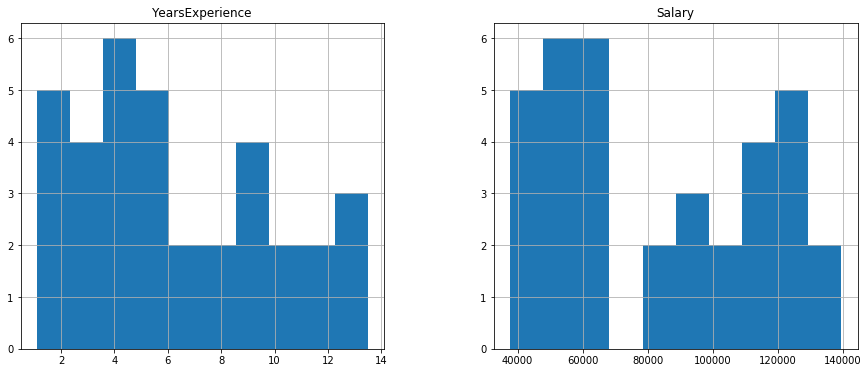

In [79]:
# histogram representation of dataset
salary.hist(figsize=(15,6))

In [80]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

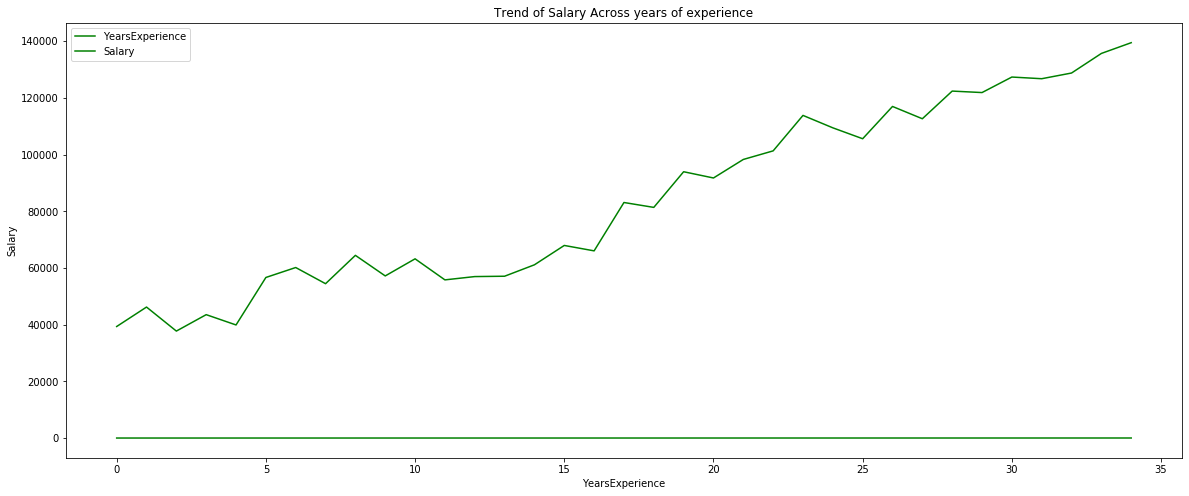

In [81]:
exp = salary[['YearsExperience', 'Salary']]
exp.plot(kind = 'line',figsize=(20,8),color='g')
plt.title('Trend of Salary Across years of experience')
plt.ylabel("Salary")
plt.xlabel("YearsExperience")
plt.show()
# shows a lenier growth with years of experience

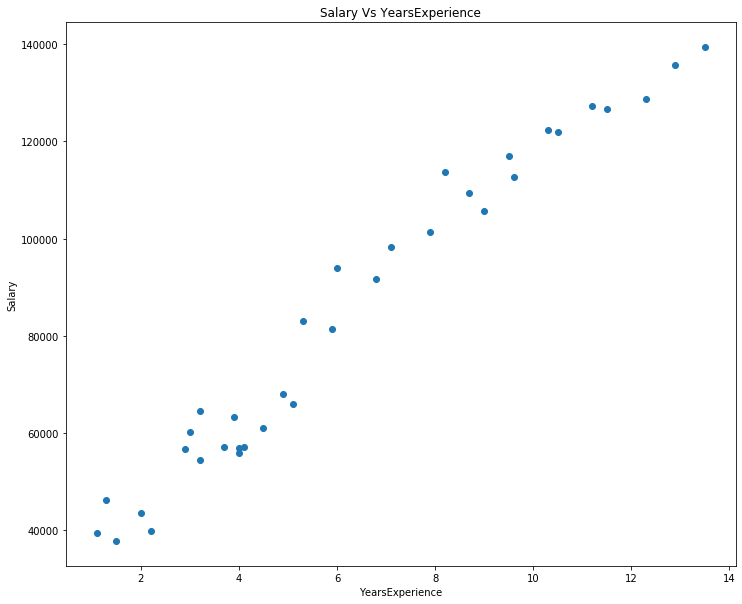

In [82]:
plt.figure(figsize=(12,10))
plt.scatter(salary['YearsExperience'],salary['Salary'])
plt.title("Salary Vs YearsExperience")
plt.ylabel("Salary")
plt.xlabel("YearsExperience")
plt.show()

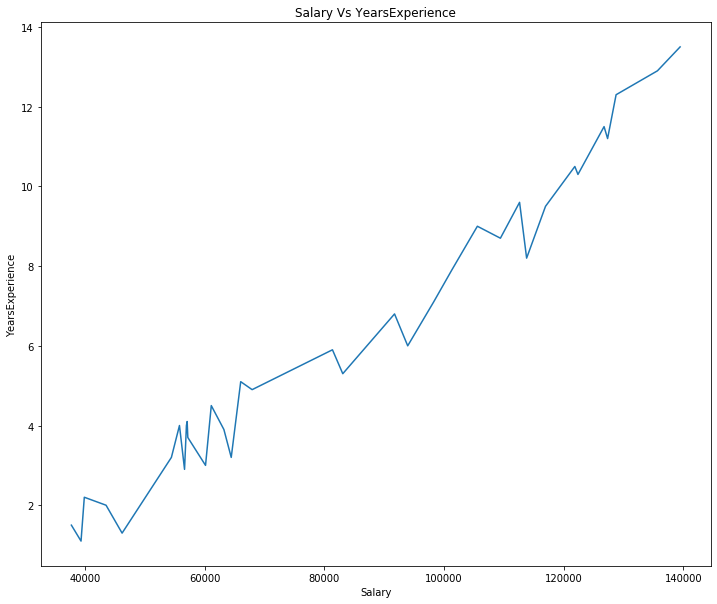

In [83]:
#lets check how salary is changing with respect to years of experience
plt.figure(figsize=(12,10))
sns.lineplot(x=salary["Salary"],y=salary["YearsExperience"],data=salary)
plt.title("Salary Vs YearsExperience")
plt.show()

In [84]:
# Installing and importing important libraries for graphical representation 
!pip install plotly==3.10
import plotly.plotly as po
import plotly.figure_factory as ff
import numpy as np
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [85]:
dataframe = salary
data = dataframe.loc[:,['YearsExperience', 'Salary']]
data["index"] = np.arange(1, len(data) + 1)

fig = ff.create_scatterplotmatrix(data, diag = 'box', index = 'index', colormap = 'Portland',
                                  colormap_type = 'cat',
                                  height = 800, width = 1000)
iplot(fig)

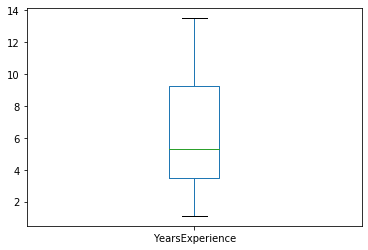

In [86]:
salary['YearsExperience'].plot.box()

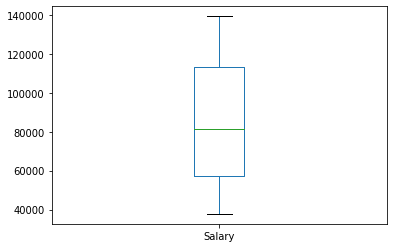

In [87]:
salary['Salary'].plot.box()

# Bivariate Analysis

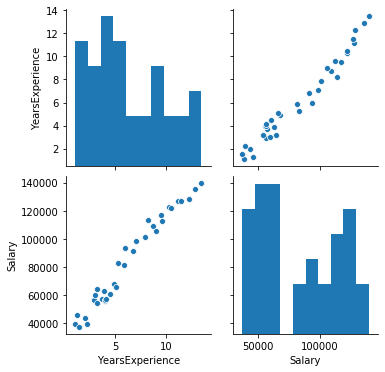

In [88]:
sns.pairplot(salary)

# Checking null value if any

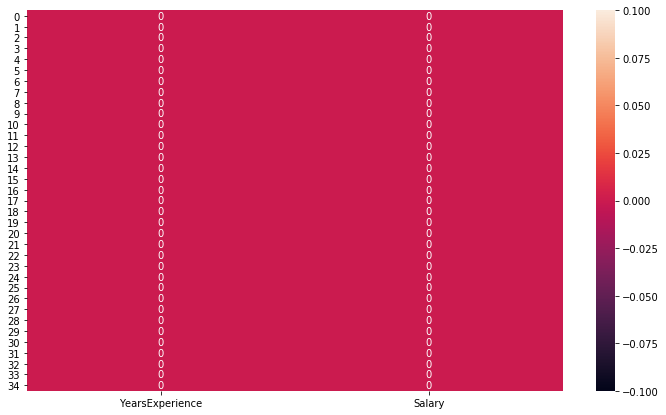

In [89]:
# checking if there are null values present in the dataset or not using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
sns.heatmap(salary.isnull(),annot=True)
plt.show()

In [90]:
# Checking the null value without using visualization
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [91]:
salary.shape

(35, 2)

# Checking Correlation

In [92]:
dfcor=salary.corr()
dfcor

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


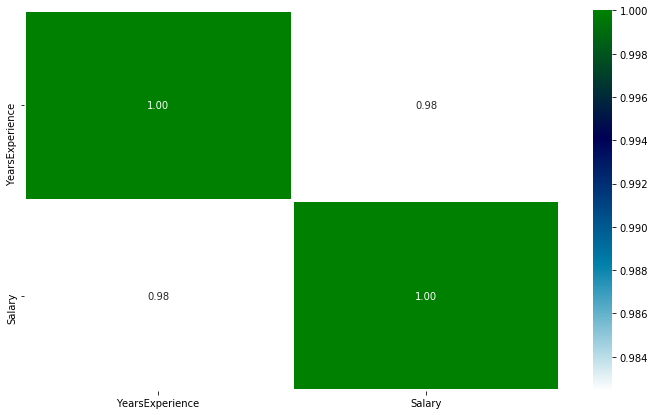

In [93]:
# generating heatmap to check the correlation amount features
plt.figure(figsize=(12,7))
sns.heatmap(dfcor,cmap='ocean_r',linewidths=2,fmt=".2f",annot=True)

# shows very positive correlation

# Plotting Outliers

In [94]:
salary.shape

(35, 2)

In [95]:
collist=salary.columns.values
ncol=2
nrows=2

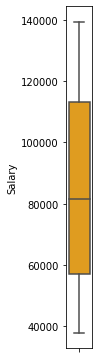

In [96]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(salary[collist[i]],color='orange',orient='v')
    plt.tight_layout()

In [97]:
# removing if any outliners present in the dataset or not
from scipy.stats import zscore
z_score=abs(zscore(salary))
print(salary.shape)
df_salary=salary.loc[(z_score<3).all(axis=1)]
print(df_salary.shape)

(35, 2)
(35, 2)


# Checking if skewness is present in datset

In [98]:
df_salary.skew()
# Below shows positive skeweed data and under limit

YearsExperience    0.420163
Salary             0.209005
dtype: float64

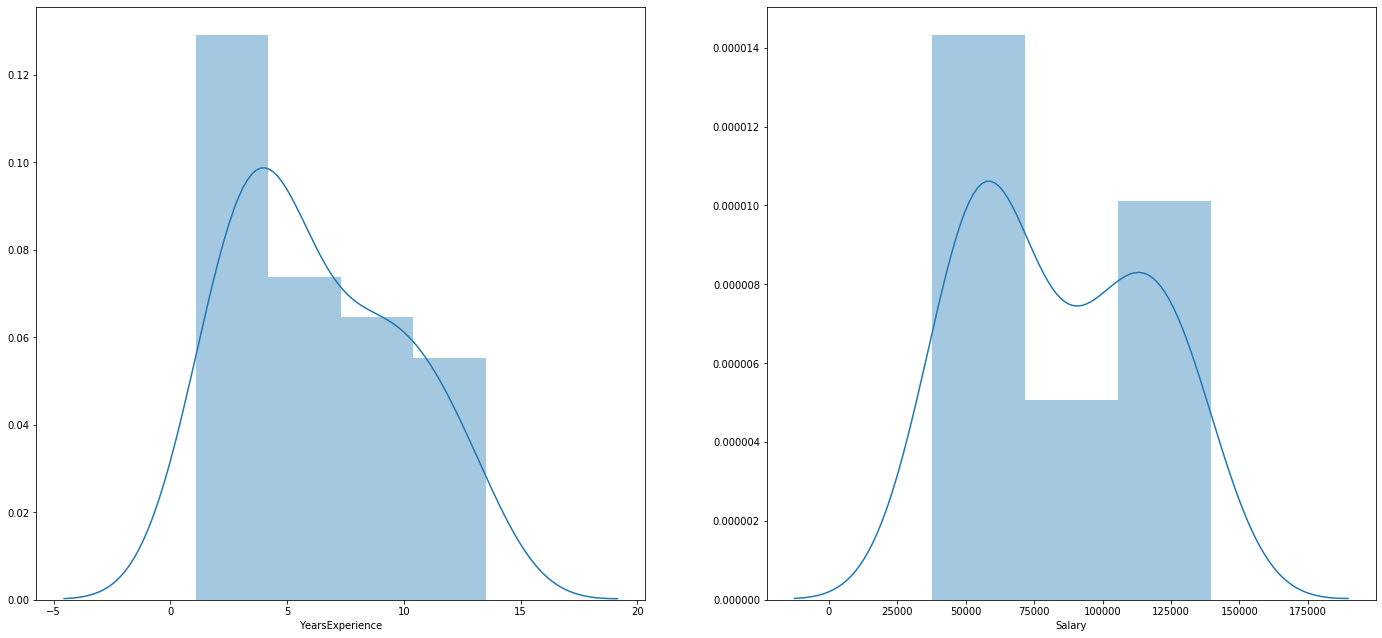

In [118]:
# plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(24,24))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_salary[collist[i]])

# Seperating input and output variable for the regression problem

In [119]:
# Seperating input and output variable for the linear regression problem

# defining x variables
x=df_salary[["YearsExperience"]]

# defining y variables
y=df_salary["Salary"]


In [120]:
x.shape

(35, 1)

In [122]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [121]:
y.shape

(35,)

In [123]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [124]:
# Scaling down using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.46039873],
       [-1.40432198],
       [-1.34824523],
       [-1.20805336],
       [-1.15197661],
       [-0.955708  ],
       [-0.92766962],
       [-0.87159288],
       [-0.87159288],
       [-0.73140101],
       [-0.67532426],
       [-0.64728589],
       [-0.64728589],
       [-0.61924751],
       [-0.50709402],
       [-0.39494052],
       [-0.33886377],
       [-0.28278703],
       [-0.11455678],
       [-0.08651841],
       [ 0.13778858],
       [ 0.2219037 ],
       [ 0.44621069],
       [ 0.53032581],
       [ 0.67051768],
       [ 0.7546328 ],
       [ 0.89482467],
       [ 0.92286305],
       [ 1.11913166],
       [ 1.17520841],
       [ 1.37147703],
       [ 1.45559215],
       [ 1.67989914],
       [ 1.84812938],
       [ 2.01635962]])

# # data is ready for machine learning

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=r_state,test_size=0.20)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
    print()
    print()
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    # The below output shows that we are getting level of r2 score in most of the cases and max value is also shown

r2_score corresponding to random state:  42  is:  0.891423414004278


max r2 score corresponding to  42  is  0.891423414004278
r2_score corresponding to random state:  43  is:  0.9802305207599402


max r2 score corresponding to  43  is  0.9802305207599402
r2_score corresponding to random state:  44  is:  0.9548913170296416


max r2 score corresponding to  43  is  0.9802305207599402
r2_score corresponding to random state:  45  is:  0.9622918082155796


max r2 score corresponding to  43  is  0.9802305207599402
r2_score corresponding to random state:  46  is:  0.974544324718912


max r2 score corresponding to  43  is  0.9802305207599402
r2_score corresponding to random state:  47  is:  0.9751319108791024


max r2 score corresponding to  43  is  0.9802305207599402
r2_score corresponding to random state:  48  is:  0.9406195256733534


max r2 score corresponding to  43  is  0.9802305207599402
r2_score corresponding to random state:  49  is:  0.9666319804216519


max r2 score corresponding to

In [129]:
# using corss_val_score to check the score of the regression
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(lr,x,y,cv=5)
print(a_score)
print(a_score.mean())
print(np.std(a_score))

[ 0.65510864 -2.50375787  0.6436224  -0.48772673 -1.81809826]
-0.7021703650913066
1.2798721143389482


In [130]:
# since maximum r2 score is comming around random state 84 we'll use that to checking with other Models
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 84,test_size=0.20)

In [131]:
x_train.shape

(28, 1)

In [132]:
y_train.shape

(28,)

In [133]:
x_test.shape

(7, 1)

In [134]:
y_test.shape

(7,)

In [136]:
# Importing important libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

In [140]:
# finding best parameters for SVR using GridSearchCV
svr=SVR()
parameters={'kernel':('linear','ploy','rbf'), 'C':[1,10]}
svrgd=GridSearchCV(svr,parameters, cv=5)
svrgd.fit(x_train,y_train)
svrgd.best_params_

{'C': 10, 'kernel': 'linear'}

In [141]:
# finding best parameters for DecisionTreeRegressor using GridSearchCV
dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
dtrgd=GridSearchCV(dtr,parameters, cv=5)
dtrgd.fit(x_train,y_train)
dtrgd.best_params_

{'criterion': 'mse'}

In [151]:
# finding best parameters for KNN using GridSearchCV
# Expected n_neighbors <= n_samples = 22
parameters={'n_neighbors':range(1,22)}
knngd=GridSearchCV(knn,parameters, cv=5)
knngd.fit(x_train,y_train)
knngd.best_params_

{'n_neighbors': 4}

In [144]:
# finding best parameters for RandomForestRegressor using GridSearchCV
rfr=RandomForestRegressor()
parameters={'n_estimators':[100,199]}
rfrgd=GridSearchCV(rfr,parameters, cv=5)
rfrgd.fit(x_train,y_train)
rfrgd.best_params_

{'n_estimators': 100}

In [145]:
# finding best alpha value for lasso regression using GridSearchCV
lsor=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
lasgd=GridSearchCV(lsor,parameters, cv=5)
lasgd.fit(x_train,y_train)
lasgd.best_params_

{'alpha': 0.001}

In [146]:
# finding best parameters for gradient boosting using GridSearchCV
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
gbrgd=GridSearchCV(gbr,parameters, cv=5)
gbrgd.fit(x_train,y_train)
gbrgd.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [152]:
lr = LinearRegression()
svr = SVR(C=10, kernel='linear')
dtr = DecisionTreeRegressor(criterion='mse')
knn = KNeighborsRegressor(n_neighbors=4)
rfr = RandomForestRegressor(n_estimators=100)
lsor = Lasso(alpha=0.001)
gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500)

In [153]:
models = []
models.append(('LinearRegression', lr))
models.append(('SVR', svr))
models.append(('DecisionTreeRegressor', dtr))
models.append(('KNeighborsRegressor', knn))
models.append(('RandomForestRegressor', rfr))
models.append(('Lasso', lsor))
models.append(('GradientBoostingRegressor', gbr))

In [156]:
# Testing all required models with best parameters calculated

Model=[]
score=[]
rmse=[]
mae=[]
mse=[]
cvs=[]
std=[]

for name,model in models:
    print('********************',name,'**********************')
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    predict=model.predict(x_test)
    print("\n")
    rscore=r2_score(y_test,predict)
    print("r2 Score =", rscore)
    score.append(rscore*100)
    print("\n")
    RMS=np.sqrt(mean_squared_error(y_test,predict))
    print("RMSE =", RMS)
    rmse.append(RMS*100)
    print("\n")
    MA=mean_absolute_error(y_test,predict)
    print("MAE =", MA)
    mae.append(MA*100)
    print("\n")
    MS=mean_squared_error(y_test,predict)
    print("MSE =", MS)
    mse.append(MS*100)
    print("\n")
    cvscore=cross_val_score(model, x, y, cv=10).mean()
    print("Cross_val_score =", cvscore)
    cvs.append(cvscore*100)
    print("\n")
    stdscore=cross_val_score(model, x, y, cv=10).std()
    print("Standard Deviation =", stdscore)
    std.append(stdscore*100)
    print("\n\n")

******************** LinearRegression **********************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2 Score = 0.9859377707625315


RMSE = 3605.8770601030315


MAE = 3447.628056123615


MSE = 13002349.372577282


Cross_val_score = -1.4389719717572487


Standard Deviation = 2.1576227735298628



******************** SVR **********************


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


r2 Score = 0.0036044955492047226


RMSE = 30352.86628495493


MAE = 28471.072125130166


MSE = 921296491.7123536


Cross_val_score = -152.37621560716264


Standard Deviation = 155.0753024011186



******************** DecisionTreeRegressor **********************


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impuri

In [157]:
import pandas as pd
result=pd.DataFrame({'Model': Model, 'r2_score': score, 'Root_mean_square': rmse,'Mean_absolute_error': mae, 'Mean_square_error': mse, 'Cross_val_score_mean':cvs, 'Cross_val_score_Std': std })
result

,Model,r2_score,Root_mean_square,Mean_absolute_error,Mean_square_error,Cross_val_score_mean,Cross_val_score_Std
0,LinearRegression,98.593777,3.605877e+05,3.447628e+05,1.300235e+09,-143.897197,215.762277
1,SVR,0.360450,3.035287e+06,2.847107e+06,9.212965e+10,-15237.621561,15507.530240
2,DecisionTreeRegressor,96.512145,5.678885e+05,4.990714e+05,3.224973e+09,-196.181206,279.400257
3,KNeighborsRegressor,99.404938,2.345658e+05,1.998643e+05,5.502114e+08,-276.967932,351.430223
4,RandomForestRegressor,98.251543,4.020789e+05,3.321729e+05,1.616675e+09,-139.571739,191.307392
5,Lasso,98.593777,3.605877e+05,3.447628e+05,1.300235e+09,-143.897182,215.762234
6,GradientBoostingRegressor,97.253820,5.039046e+05,4.450121e+05,2.539199e+09,-165.850816,269.376735


In [ ]:
# The above analysis shows that LinearRegression and Lasso is giving the same result, hence we can select any one model.

In [162]:
from sklearn.externals import joblib
# Save the model as a pickle in a file
joblib.dump(lr, 'Salary_lr.cvs')

['Salary_lr.cvs']

In [163]:
model=joblib.load('Salary_lr.cvs')

In [164]:
model.predict(x_test)

array([ 54892.04746551,  46207.50165644,  54023.5928846 ,  87893.32153999,
       118289.23187176, 120026.14103357,  60971.22953186])